# visualize_cardinalities

## imports

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## load data

In [30]:
df = pd.read_csv('data/cardinalities.csv')

## examine data

In [32]:
df

,name,operator_type,real_input,real_output,estimated_input,estimated_output
0,TPC-H 01,TableScan,60175,59775,60175.000000,60165.917969
1,TPC-H 02,JoinHashRight,9,8,4.180000,16.719999
2,TPC-H 02,Aggregate,8,7,16.719999,16.719999
3,TPC-H 02,JoinHashLeft,8,8,16.719999,16.719999
4,TPC-H 02,JoinHashLeft,12,12,20.000000,20.000000
...,...,...,...,...,...,...
147,TPC-H 21,JoinHashLeft,60175,2447,60175.000000,2407.000000
148,TPC-H 21,JoinHashRight,4,2447,4.000000,2407.000000
149,TPC-H 21,TableScan,25,1,25.000000,1.000000
150,TPC-H 22,JoinHashRight,15000,59,15000.000000,1500.000000


In [49]:
for index, row in df.iterrows():
    if row['estimated_input'] < row['estimated_output']:
        if row['operator_type'] != 'JoinHashRight' and row['operator_type'] != 'JoinHashLeft':
            print(row)

In [41]:
for index, row in df.iterrows():
    if type(row['real_output']) != int:
        print(type(row['real_output']))

## plot

<AxesSubplot: xlabel='name', ylabel='real_output'>

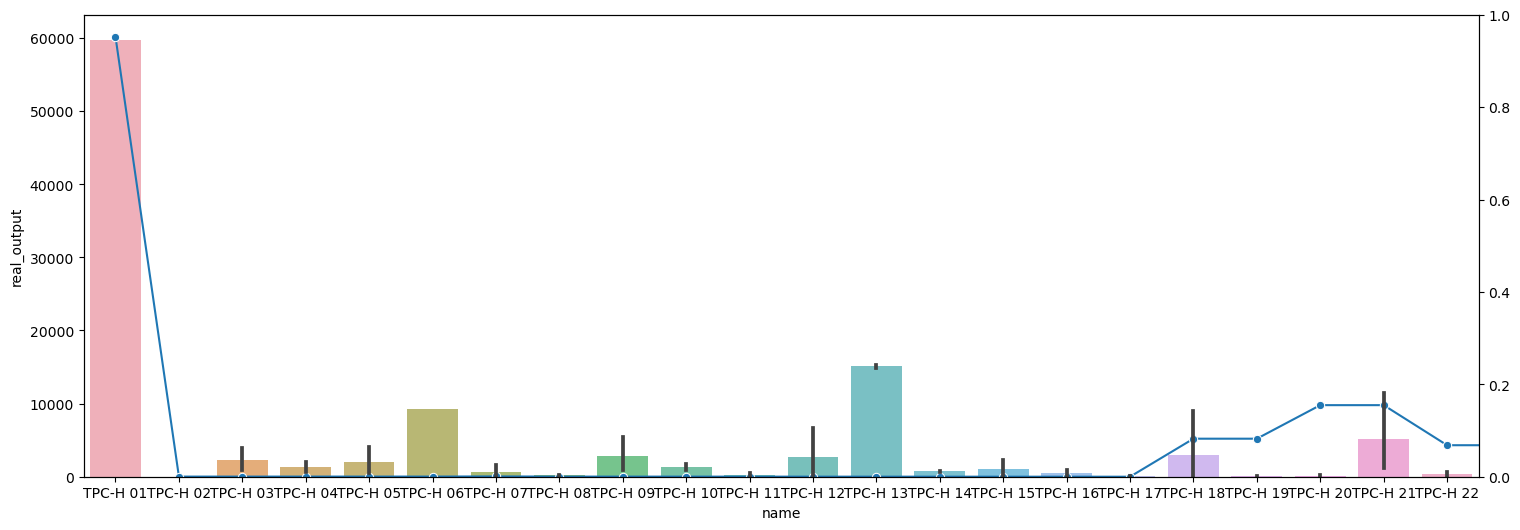

In [57]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(18,6))

sns.lineplot(data = df['estimated_output'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = df, x='name', y='real_output', alpha=0.75, ax=ax1)